# AQI Data Analysis & Preprocessing Project




### **Objective**
In this project, we will:
- Load and understand the AQI dataset  
- Perform data cleaning  
- Handle missing values  
- Conduct Exploratory Data Analysis (EDA)  
- Detect and treat outliers  
- Do basic feature engineering  
- Save the cleaned dataset  

This notebook demonstrates a full data-science workflow for environmental data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Load Dataset
We load the AQI dataset and preview the first few rows.


In [3]:
df = pd.read_csv("/Users/gaurvi/Downloads/Predictve_Data.csv")
df.head()


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Gaya,"Collectorate, Gaya - BSPCB",10-12-2025 22:00:00,24.795500,84.999400,NO2,9.0,9.0,9.0
1,India,Bihar,Gaya,"Collectorate, Gaya - BSPCB",10-12-2025 22:00:00,24.795500,84.999400,SO2,8.0,26.0,12.0
2,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-12-2025 22:00:00,24.792403,84.992416,PM10,102.0,360.0,178.0
3,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-12-2025 22:00:00,24.792403,84.992416,NO2,2.0,8.0,4.0
4,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-12-2025 22:00:00,24.792403,84.992416,NH3,4.0,6.0,5.0


## Dataset Overview
We check:
- Shape
- Data types
- Missing values


In [4]:
print("Shape:", df.shape)



Shape: (3300, 11)


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3300 non-null   object 
 1   state          3300 non-null   object 
 2   city           3300 non-null   object 
 3   station        3300 non-null   object 
 4   last_update    3300 non-null   object 
 5   latitude       3300 non-null   float64
 6   longitude      3300 non-null   float64
 7   pollutant_id   3300 non-null   object 
 8   pollutant_min  3086 non-null   float64
 9   pollutant_max  3086 non-null   float64
 10  pollutant_avg  3086 non-null   float64
dtypes: float64(5), object(6)
memory usage: 283.7+ KB


country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    214
pollutant_max    214
pollutant_avg    214
dtype: int64

## Handling Missing Values
The pollutant variables contain missing values.

Strategy:
- Drop rows where pollutant_min, pollutant_max, pollutant_avg are missing.


In [6]:
df_clean = df.dropna(subset=['pollutant_min','pollutant_max','pollutant_avg'])
df_clean.shape


(3086, 11)

## Summary Statistics
We summarize the pollutant values to understand central tendencies and spread.


In [7]:
df_clean[['pollutant_min','pollutant_max','pollutant_avg']].describe()


,pollutant_min,pollutant_max,pollutant_avg
count,3086.000000,3086.000000,3086.000000
mean,29.723914,100.607259,58.216461
std,37.404845,109.560767,62.361807
min,1.000000,1.000000,1.000000
25%,6.000000,20.000000,13.000000
50%,16.000000,64.000000,36.500000
75%,38.000000,132.000000,79.000000
max,331.000000,500.000000,366.000000


# Exploratory Data Analysis (EDA)
We visualize:
- Distribution of pollutants
- Boxplots to inspect outliers


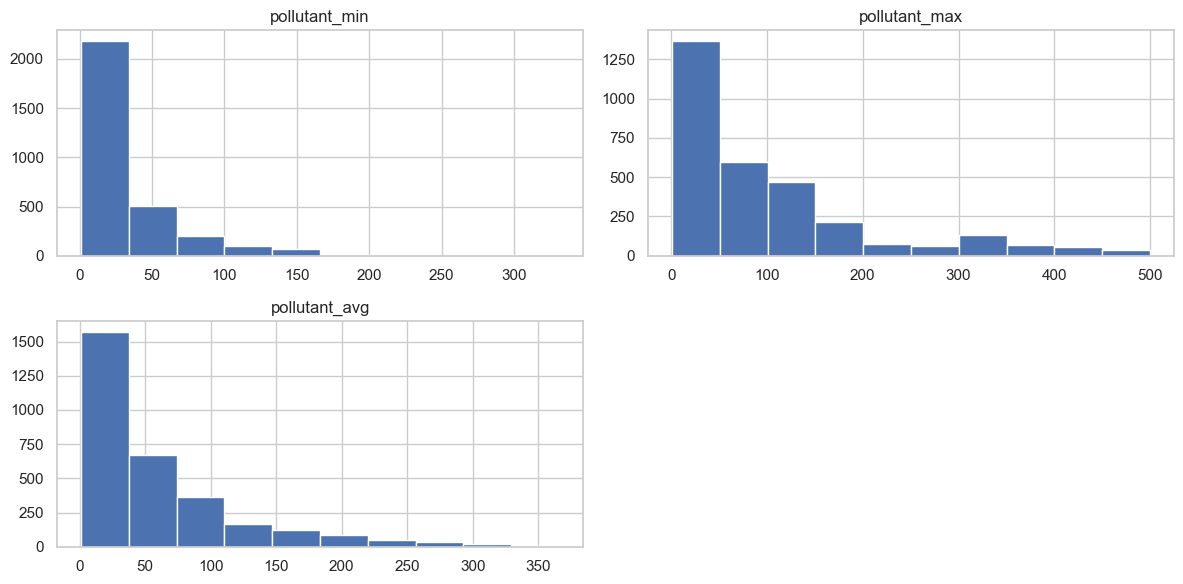

In [8]:
df_clean[['pollutant_min','pollutant_max','pollutant_avg']].hist(figsize=(12,6))
plt.tight_layout()
plt.show()


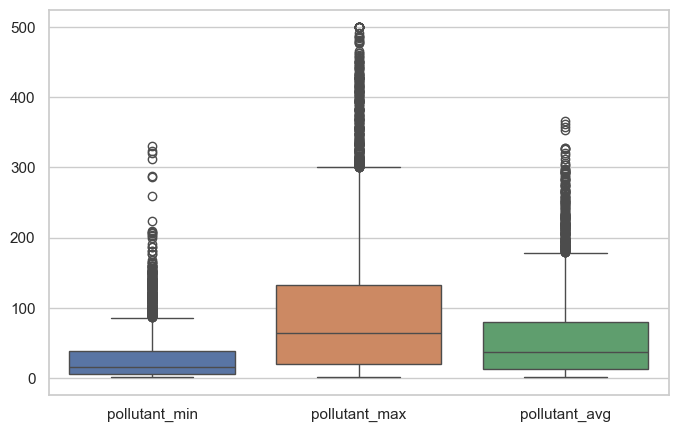

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean[['pollutant_min','pollutant_max','pollutant_avg']])
plt.show()

## Outlier Detection (IQR Method)
We compute IQR bounds and check how many outliers exist for each pollutant.


In [10]:
outliers = {}

for col in ['pollutant_min','pollutant_max','pollutant_avg']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers[col] = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)].shape[0]

outliers


{'pollutant_min': 260, 'pollutant_max': 296, 'pollutant_avg': 201}

## Outlier Treatment
We cap extreme values using IQR bounds (winsorization).


In [11]:
df_out = df_clean.copy()

for col in ['pollutant_min','pollutant_max','pollutant_avg']:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_out[col] = df_out[col].clip(lower, upper)

df_out.head()


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Gaya,"Collectorate, Gaya - BSPCB",10-12-2025 22:00:00,24.795500,84.999400,NO2,9.0,9.0,9.0
1,India,Bihar,Gaya,"Collectorate, Gaya - BSPCB",10-12-2025 22:00:00,24.795500,84.999400,SO2,8.0,26.0,12.0
2,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-12-2025 22:00:00,24.792403,84.992416,PM10,86.0,300.0,178.0
3,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-12-2025 22:00:00,24.792403,84.992416,NO2,2.0,8.0,4.0
4,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",10-12-2025 22:00:00,24.792403,84.992416,NH3,4.0,6.0,5.0


## Feature Engineering
We extract:
- Date
- Time components
- Day of week


In [12]:
df_out["last_update"] = pd.to_datetime(df_out["last_update"], dayfirst=True)

df_out["date"] = df_out["last_update"].dt.date
df_out["hour"] = df_out["last_update"].dt.hour
df_out["day"] = df_out["last_update"].dt.day_name()

df_out.head()


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,date,hour,day
0,India,Bihar,Gaya,"Collectorate, Gaya - BSPCB",2025-12-10 22:00:00,24.795500,84.999400,NO2,9.0,9.0,9.0,2025-12-10,22,Wednesday
1,India,Bihar,Gaya,"Collectorate, Gaya - BSPCB",2025-12-10 22:00:00,24.795500,84.999400,SO2,8.0,26.0,12.0,2025-12-10,22,Wednesday
2,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",2025-12-10 22:00:00,24.792403,84.992416,PM10,86.0,300.0,178.0,2025-12-10,22,Wednesday
3,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",2025-12-10 22:00:00,24.792403,84.992416,NO2,2.0,8.0,4.0,2025-12-10,22,Wednesday
4,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",2025-12-10 22:00:00,24.792403,84.992416,NH3,4.0,6.0,5.0,2025-12-10,22,Wednesday


In [14]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style='whitegrid')
print('Libraries imported')


Libraries imported


2. Load dataset

Load the provided CSV from /mnt/data/Predictve_Data.csv.

3. Data overview

Display shape, dtypes, null counts, basic stats.

4. Data preprocessing

Steps:

Parse datetime

Drop or impute missing pollutant values (we'll drop initial rows with missing pollutant readings)

Basic cleanup

Create cleaned dataframe df_clean

In [15]:
df['last_update'] = pd.to_datetime(df['last_update'], dayfirst=True, errors='coerce')
# Drop rows without pollutant values
req_cols = ['pollutant_min','pollutant_max','pollutant_avg']
df_clean = df.dropna(subset=req_cols).reset_index(drop=True)
print('After drop shape:', df_clean.shape)

# Convert pollutant columns to numeric if not already
for c in req_cols:
    df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')

# Quick check
df_clean[req_cols].describe()


After drop shape: (3086, 11)


,pollutant_min,pollutant_max,pollutant_avg
count,3086.000000,3086.000000,3086.000000
mean,29.723914,100.607259,58.216461
std,37.404845,109.560767,62.361807
min,1.000000,1.000000,1.000000
25%,6.000000,20.000000,13.000000
50%,16.000000,64.000000,36.500000
75%,38.000000,132.000000,79.000000
max,331.000000,500.000000,366.000000


5. Exploratory Data Analysis (EDA)

Plot distributions, boxplots, and correlation heatmap (numeric features only).

<Figure size 1200x500 with 0 Axes>

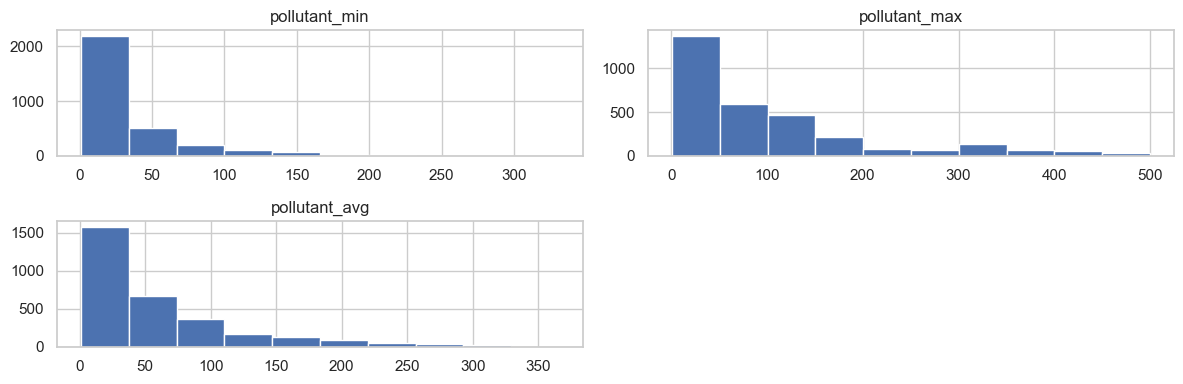

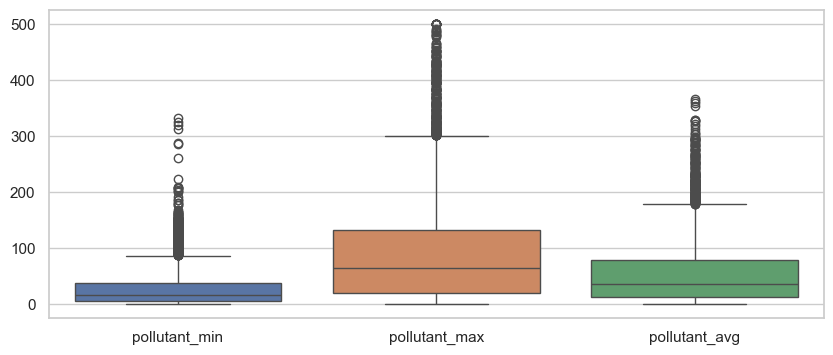

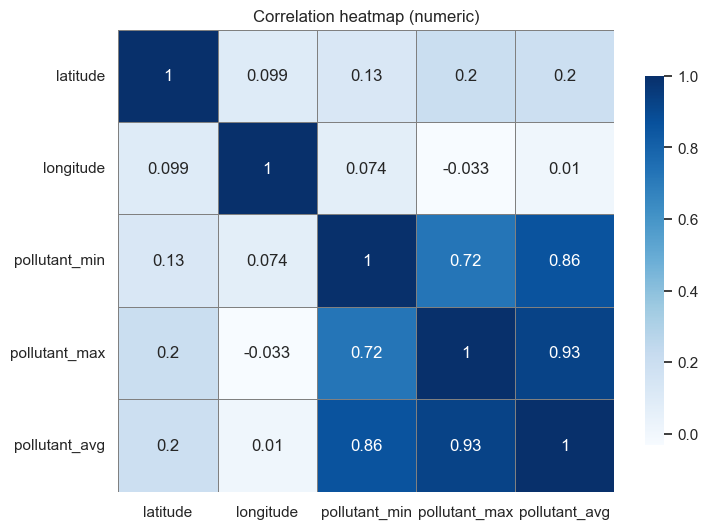

In [16]:
plt.figure(figsize=(12,5))
df_clean[['pollutant_min','pollutant_max','pollutant_avg']].hist(figsize=(12,4))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df_clean[['pollutant_min','pollutant_max','pollutant_avg']])
plt.show()

# Correlation heatmap (monochrome)
numeric_df = df_clean.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5, linecolor='gray', cbar_kws={'shrink':0.8})
plt.title('Correlation heatmap (numeric)')
plt.show()


6. Outlier detection and treatment

Using IQR method to flag outliers and capping them (winsorization)."

In [17]:
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR, Q3 + 1.5*IQR

df_proc = df_clean.copy()
for col in ['pollutant_min','pollutant_max','pollutant_avg']:
    low, high = iqr_bounds(df_proc[col])
    print(col, 'bounds:', low, high)
    df_proc[col] = df_proc[col].clip(lower=low, upper=high)

# check
df_proc[['pollutant_min','pollutant_max','pollutant_avg']].describe()


pollutant_min bounds: -42.0 86.0
pollutant_max bounds: -148.0 300.0
pollutant_avg bounds: -86.0 178.0


,pollutant_min,pollutant_max,pollutant_avg
count,3086.000000,3086.000000,3086.000000
mean,26.219378,93.723914,54.640635
std,26.594612,91.629606,52.032001
min,1.000000,1.000000,1.000000
25%,6.000000,20.000000,13.000000
50%,16.000000,64.000000,36.500000
75%,38.000000,132.000000,79.000000
max,86.000000,300.000000,178.000000


7. Feature engineering

Create date parts and simple AQI category based on pollutant_avg. Encode pollutant_id if needed.

In [18]:
df_proc['date'] = df_proc['last_update'].dt.date
df_proc['hour'] = df_proc['last_update'].dt.hour
df_proc['dayofweek'] = df_proc['last_update'].dt.day_name()

# Simple AQI category
def aqi_cat(x):
    if pd.isna(x):
        return np.nan
    x = float(x)
    if x<=50:
        return 'Good'
    elif x<=100:
        return 'Moderate'
    elif x<=200:
        return 'Unhealthy for Sensitive Groups'
    elif x<=300:
        return 'Unhealthy'
    elif x<=400:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df_proc['AQI_category'] = df_proc['pollutant_avg'].apply(aqi_cat)

# Encode pollutant_id (one-hot for top pollutants, else 'Other')
top_p = df_proc['pollutant_id'].value_counts().nlargest(6).index.tolist()
df_proc['pollutant_id_enc'] = df_proc['pollutant_id'].apply(lambda x: x if x in top_p else 'Other')
df_proc = pd.get_dummies(df_proc, columns=['pollutant_id_enc','dayofweek'], drop_first=True)

print('Features added. Shape now:', df_proc.shape)
df_proc.columns


Features added. Shape now: (3086, 20)


Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg', 'date', 'hour', 'AQI_category', 'pollutant_id_enc_NO2',
       'pollutant_id_enc_OZONE', 'pollutant_id_enc_Other',
       'pollutant_id_enc_PM10', 'pollutant_id_enc_PM2.5',
       'pollutant_id_enc_SO2'],
      dtype='object')

8. Prepare data for modeling

Select features and target. Split into train/test. Apply scaling where needed.

In [19]:
# Choose feature columns
feature_cols = [
    'pollutant_min','pollutant_max','latitude','longitude','hour'
]
# add any encoded pollutant/day columns
enc_cols = [c for c in df_proc.columns if c.startswith('pollutant_id_enc_') or c.startswith('dayofweek_')]
feature_cols += enc_cols

X = df_proc[feature_cols].fillna(0)
y = df_proc['pollutant_avg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X_train shape:', X_train.shape, 'X_test shape:', X_test.shape)


X_train shape: (2468, 11) X_test shape: (618, 11)


9. Modeling: Baseline Multiple Linear Regression

Train a baseline Linear Regression and evaluate with MAE, MSE, RMSE, R2.

In [20]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse,'R2':r2}

metrics_lr = regression_metrics(y_test, y_pred_lr)
metrics_lr


{'MAE': 6.418126681555513,
 'MSE': 147.16492365519852,
 'RMSE': np.float64(12.131155083305073),
 'R2': 0.9445089442872234}

10. Polynomial Regression (degree=2)

Check if a polynomial transform improves fit.

In [21]:
poly_pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('lr', LinearRegression())])
poly_pipe.fit(X_train_scaled, y_train)
y_pred_poly = poly_pipe.predict(X_test_scaled)
metrics_poly = regression_metrics(y_test, y_pred_poly)
metrics_poly


{'MAE': 6.130546285882556,
 'MSE': 123.99020407769906,
 'RMSE': np.float64(11.135088867076862),
 'R2': 0.953247369336225}

11. Tree-based models: Decision Tree & Random Forest

Train a Decision Tree and a Random Forest and compare.

In [22]:
dt = DecisionTreeRegressor(random_state=42, max_depth=6)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
metrics_dt = regression_metrics(y_test, y_pred_dt)

rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=12)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
metrics_rf = regression_metrics(y_test, y_pred_rf)

metrics = pd.DataFrame([metrics_lr, metrics_poly, metrics_dt, metrics_rf], index=['Linear','Poly2','DecisionTree','RandomForest'])
metrics


,MAE,MSE,RMSE,R2
Linear,6.418127,147.164924,12.131155,0.944509
Poly2,6.130546,123.990204,11.135089,0.953247
DecisionTree,6.910449,162.725880,12.756405,0.938641
RandomForest,5.745215,126.117751,11.230216,0.952445


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [24]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [25]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [26]:
def evaluate(y_test, y_pred):
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-"*40)

print("Linear Regression")
evaluate(y_test, lr_pred)

print("Decision Tree")
evaluate(y_test, dt_pred)

print("Random Forest")
evaluate(y_test, rf_pred)

Linear Regression
MAE: 6.418126681555513
RMSE: 12.131155083305076
R2 Score: 0.9445089442872234
----------------------------------------
Decision Tree
MAE: 7.9288025889967635
RMSE: 16.00515693592816
R2 Score: 0.9034085797937229
----------------------------------------
Random Forest
MAE: 5.762815533980582
RMSE: 11.274962223402728
R2 Score: 0.9520654263697576
----------------------------------------


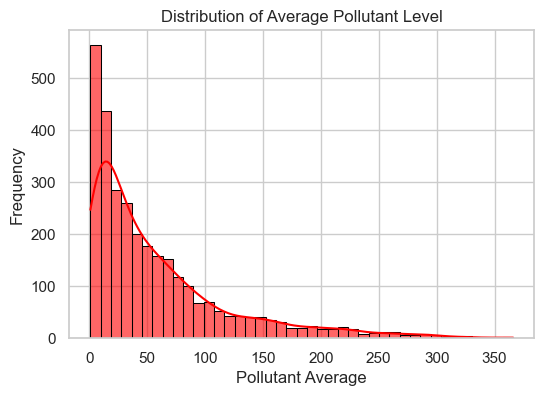

In [47]:

plt.figure(figsize=(6,4))

# Normalize values for color gradient effect
values = df['pollutant_avg']
norm = (values - values.min()) / (values.max() - values.min())
colors = plt.cm.Reds(norm)  # Reds colormap gradient

# Plot histogram
sns.histplot(values, kde=True, color='red', edgecolor='black', alpha=0.6)

plt.title("Distribution of Average Pollutant Level")
plt.xlabel("Pollutant Average")
plt.ylabel("Frequency")
plt.show()

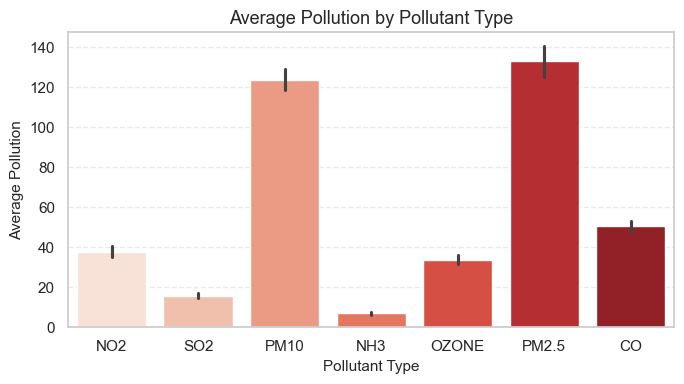

In [41]:
plt.figure(figsize=(7,4))

sns.barplot(
    x='pollutant_id',
    y='pollutant_avg',
    data=df,
    palette='Reds'   # gradient red palette
)

plt.title("Average Pollution by Pollutant Type", fontsize=13)
plt.xlabel("Pollutant Type", fontsize=11)
plt.ylabel("Average Pollution", fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

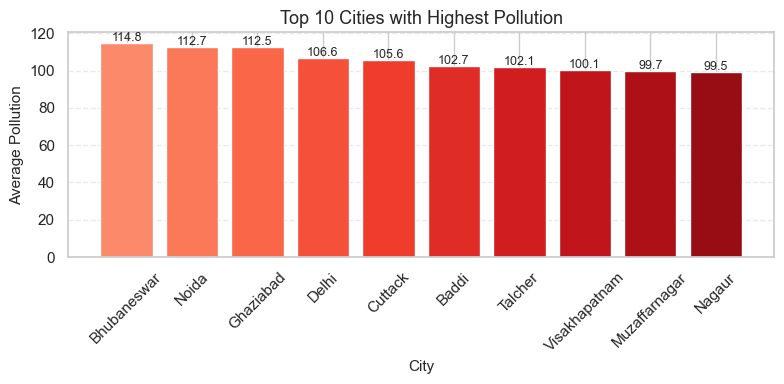

In [42]:
top_cities = df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))

colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_cities)))

bars = plt.bar(top_cities.index, top_cities.values, color=colors)

# value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{height:.1f}', ha='center', fontsize=9)

plt.title("Top 10 Cities with Highest Pollution", fontsize=13)
plt.xlabel("City", fontsize=11)
plt.ylabel("Average Pollution", fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

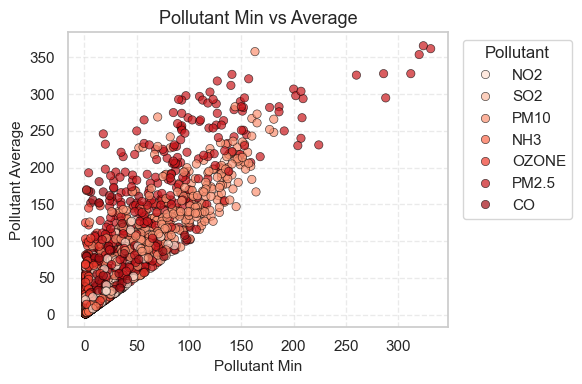

In [44]:
plt.figure(figsize=(6,4))

sns.scatterplot(
    x='pollutant_min',
    y='pollutant_avg',
    data=df,
    hue='pollutant_id',        # adds color by pollutant
    palette='Reds',
    alpha=0.7,
    edgecolor='black'
)

plt.title("Pollutant Min vs Average", fontsize=13)
plt.xlabel("Pollutant Min", fontsize=11)
plt.ylabel("Pollutant Average", fontsize=11)

plt.grid(linestyle='--', alpha=0.4)
plt.legend(title="Pollutant", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

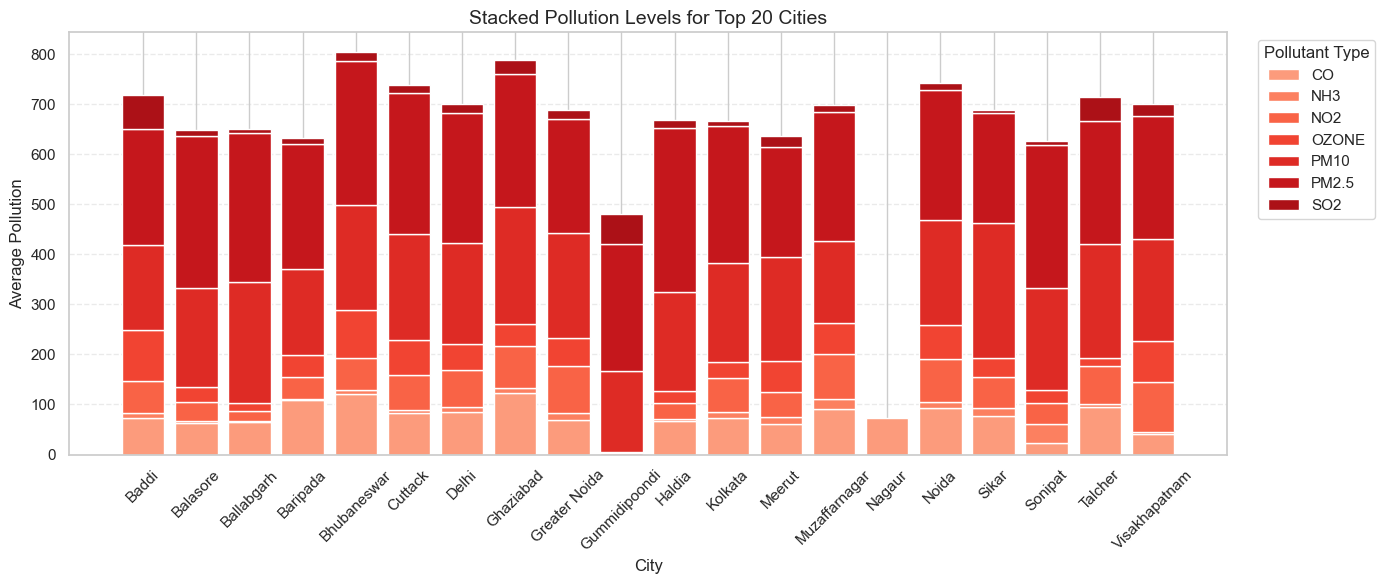

In [43]:
# Get top 20 cities by average pollution
top_20_cities = (
    df.groupby('city')['pollutant_avg']
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# Prepare data for stacking (city vs pollutant)
stacked_data = (
    df[df['city'].isin(top_20_cities)]
    .groupby(['city', 'pollutant_id'])['pollutant_avg']
    .mean()
    .unstack(fill_value=0)
)

# Color palette (shades of red)
colors = plt.cm.Reds(np.linspace(0.35, 0.85, stacked_data.shape[1]))

plt.figure(figsize=(14,6))

bottom = np.zeros(len(stacked_data))

for i, pollutant in enumerate(stacked_data.columns):
    plt.bar(
        stacked_data.index,
        stacked_data[pollutant],
        bottom=bottom,
        label=pollutant,
        color=colors[i]
    )
    bottom += stacked_data[pollutant]

plt.title("Stacked Pollution Levels for Top 20 Cities", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Pollution", fontsize=12)

plt.xticks(rotation=45)
plt.legend(title="Pollutant Type", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()